In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("Reading_wind.csv")
data=data.drop(index=0).reset_index(drop=True)
data

,TimeStamp,Time,U10,U10max_der
0,20230101,5,3.5,5.5
1,20230101,10,3.5,7.6
2,20230101,15,3.6,6.2
3,20230101,20,3.8,9.3
4,20230101,25,4.2,9.3
...,...,...,...,...
105011,20231231,2240,4.2,6.8
105012,20231231,2245,4.1,7.1
105013,20231231,2250,4.1,7.1
105014,20231231,2255,4.2,6.8


In [4]:
def fix_time(row):
    if row['Time'] == '2400':
        new_date = pd.to_datetime(row['TimeStamp'], format='%Y%m%d') + pd.Timedelta(days=1)
        new_time = '0000'
        return new_date.strftime('%Y%m%d'), new_time
    else:
        return row['TimeStamp'], str(row['Time']).zfill(4)

data[['TimeStamp', 'Time']] = data.apply(fix_time, axis=1, result_type='expand')

# Combine 'TimeStamp' and 'Time' into a single datetime column
data['timestamp'] = pd.to_datetime(data['TimeStamp'] + ' ' + data['Time'], format='%Y%m%d %H%M')
data.set_index('timestamp', inplace=True)
data

,TimeStamp,Time,U10,U10max_der
timestamp,,,,
2023-01-01 00:05:00,20230101,0005,3.5,5.5
2023-01-01 00:10:00,20230101,0010,3.5,7.6
2023-01-01 00:15:00,20230101,0015,3.6,6.2
2023-01-01 00:20:00,20230101,0020,3.8,9.3
2023-01-01 00:25:00,20230101,0025,4.2,9.3
...,...,...,...,...
2023-12-31 22:40:00,20231231,2240,4.2,6.8
2023-12-31 22:45:00,20231231,2245,4.1,7.1
2023-12-31 22:50:00,20231231,2250,4.1,7.1


In [5]:
data['U10']= pd.to_numeric(data['U10'], errors='coerce')
data['U10max_der']= pd.to_numeric(data['U10max_der'], errors='coerce')

In [6]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 TimeStamp       0
Time            0
U10           161
U10max_der      0
dtype: int64


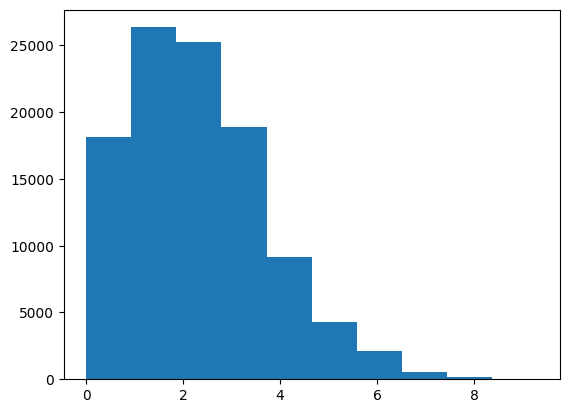

In [7]:
plt.hist(data['U10'])
plt.show()

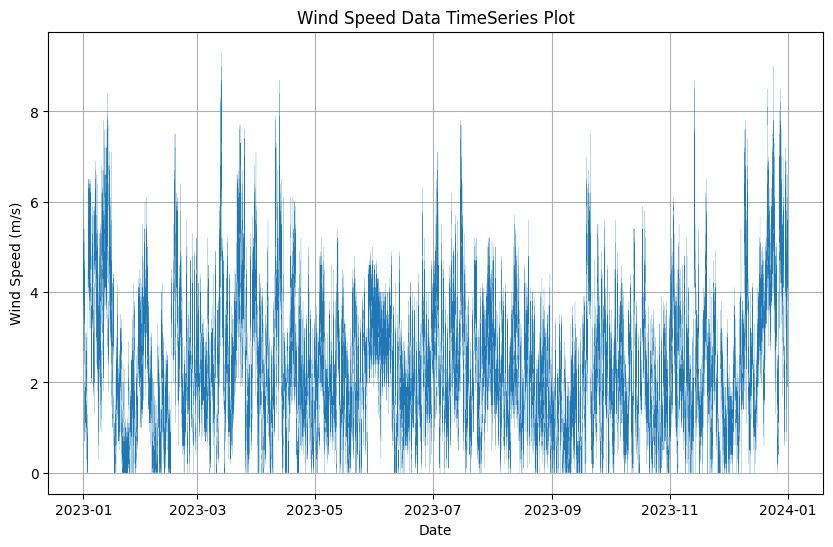

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(data['U10'], linestyle='-',lw=0.1)
plt.title('Wind Speed Data TimeSeries Plot')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

In [12]:
data['U10']=data['U10'].fillna(method='ffill')

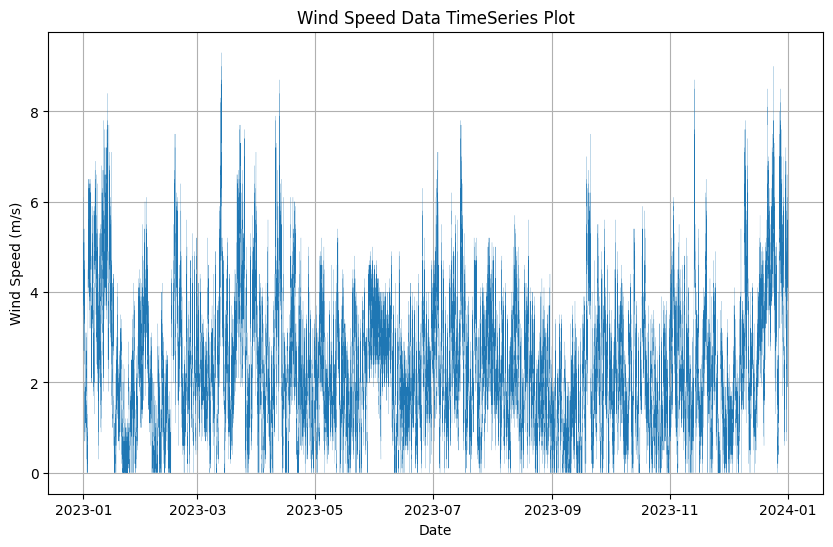

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(data['U10'], linestyle='-',lw=0.1)
plt.title('Wind Speed Data TimeSeries Plot')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

In [14]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 TimeStamp     0
Time          0
U10           0
U10max_der    0
dtype: int64


In [15]:
hourly_avg = data['U10'].resample('H').mean().ffill()
hourly_avg_max_der = data['U10max_der'].resample('H').mean().ffill()

In [16]:
hourly_avg_df = hourly_avg.reset_index()
hourly_avg_df.columns = ['timestamp', 'U10_mean']
hourly_avg_df

,timestamp,U10_mean
0,2023-01-01 00:00:00,4.554545
1,2023-01-01 01:00:00,5.091667
2,2023-01-01 02:00:00,4.766667
3,2023-01-01 03:00:00,4.575000
4,2023-01-01 04:00:00,4.083333
...,...,...
8755,2023-12-31 19:00:00,4.808333
8756,2023-12-31 20:00:00,5.016667
8757,2023-12-31 21:00:00,4.800000
8758,2023-12-31 22:00:00,4.708333


In [17]:
hourly_avg_max_der_df = hourly_avg_max_der.reset_index()
hourly_avg_max_der_df.columns = ['timestamp', 'U10_max']
hourly_avg_max_der_df

,timestamp,U10_max
0,2023-01-01 00:00:00,8.845455
1,2023-01-01 01:00:00,9.116667
2,2023-01-01 02:00:00,8.300000
3,2023-01-01 03:00:00,8.125000
4,2023-01-01 04:00:00,7.358333
...,...,...
8755,2023-12-31 19:00:00,9.108333
8756,2023-12-31 20:00:00,9.225000
8757,2023-12-31 21:00:00,8.700000
8758,2023-12-31 22:00:00,7.950000


In [18]:
hourly_avg_df= pd.concat([hourly_avg,hourly_avg_max_der], axis=1).reset_index()
hourly_avg_df

,timestamp,U10,U10max_der
0,2023-01-01 00:00:00,4.554545,8.845455
1,2023-01-01 01:00:00,5.091667,9.116667
2,2023-01-01 02:00:00,4.766667,8.300000
3,2023-01-01 03:00:00,4.575000,8.125000
4,2023-01-01 04:00:00,4.083333,7.358333
...,...,...,...
8755,2023-12-31 19:00:00,4.808333,9.108333
8756,2023-12-31 20:00:00,5.016667,9.225000
8757,2023-12-31 21:00:00,4.800000,8.700000
8758,2023-12-31 22:00:00,4.708333,7.950000


In [19]:
hourly_avg_df.set_index('timestamp', inplace=True)
print("Basic Statistics:\n", hourly_avg_df.describe())

Basic Statistics:
                U10   U10max_der
count  8760.000000  8760.000000
mean      2.301124     4.301366
std       1.388710     2.534386
min       0.000000    -0.100000
25%       1.266667     2.408333
50%       2.116667     3.950000
75%       3.141667     5.825000
max       8.416667    15.525000


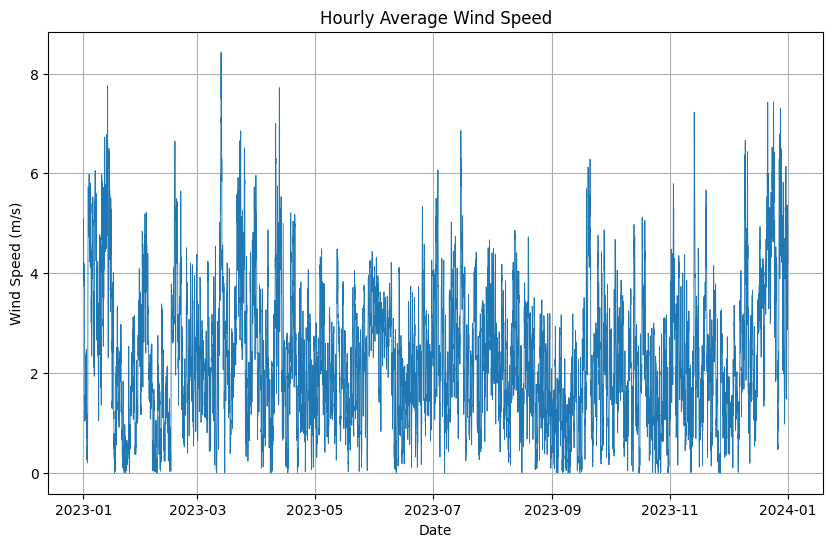

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg_df['U10'], linestyle='-',lw=0.6)
plt.title('Hourly Average Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

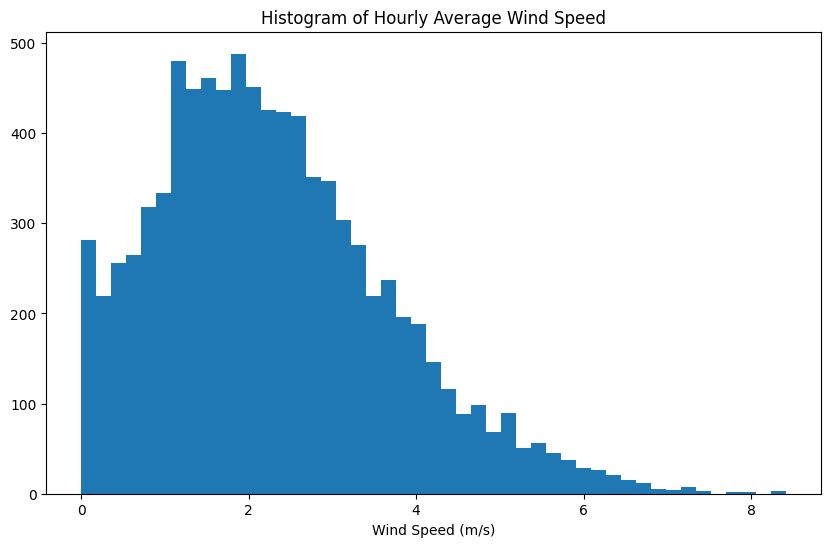

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(hourly_avg_df['U10'], bins='fd')
plt.title('Histogram of Hourly Average Wind Speed')
plt.xlabel('Wind Speed (m/s)')

plt.show()

In [24]:
print("The mean of the data is: ", hourly_avg_df['U10'].mean())
print("The variance of the data is: ", hourly_avg_df['U10'].var())

The mean of the data is:  2.3011236797195695
The variance of the data is:  1.928514863510625
